# SK03.2 - Clusterung mit KMeans

Nachdem wir einiges über die Iris-Datenbank erfahren haben, wollen wir nun versuchen, ob wir die verschiedenen Iris-Sorten anhand der Abmessungen ihrer Blütenblätter unterscheiden (_klassifizieren_) können.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.set_cmap('prism')

<Figure size 640x480 with 0 Axes>

## Laden der Datenbank

Wir laden diesmal nur die Daten und die Labels der Iris-Datenbank ein:

In [2]:
from sklearn.datasets import load_iris
X, y = load_iris(as_frame = False, return_X_y = True)

## Visualisierung der Cluster

Wir tragen zwei der gemessenen Werte gegeneinander auf. 

Figure(640x480)


<Figure size 640x480 with 0 Axes>

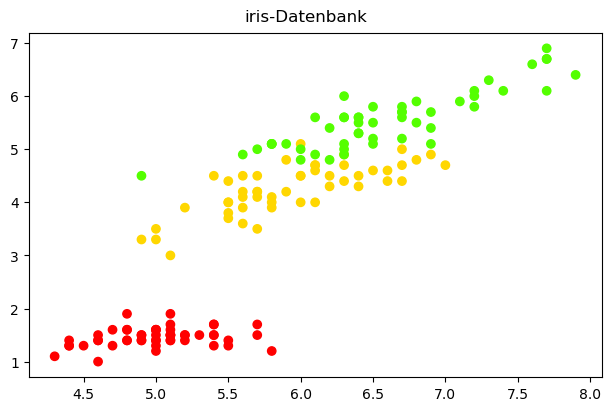

In [3]:

print(plt.gcf())
fig1, ax1 = plt.subplots(figsize=(6,4), layout='constrained')

fig1.suptitle("iris-Datenbank")
ax1.scatter(X[:,0],X[:,2],c = y);

Die drei Iris-Sorten zerfallen  in unterschiedliche Bereiche. Der Bereich links unten (_Iris setosa_) ist sehr deutlich abgetrennt; bei den beiden anderen Sorten gibt es eine Durchdringung.

### Das Modell

Wir nehmen an, dass Iris-Blüten derselben Sorte ähnliche Blütenabmessungen haben und daher im vierdimensionalen Parameterraum eng beieinander liegen. Da es drei verschiedene Sorten gibt, versuchen wir, die Daten in _drei_ Bereiche aufzuteilen.

### Cluster-Analyse

Die Bereiche werden als __Cluster__ bezeichnet. Auch ohne Kenntnis der bestehenden Klassifizierung der einzelnen Datensätze lassen sich diese Cluster durch das Verfahren der _Cluster-Analyse_ trennen. 

Eins der bekanntesten Verfahren ist __k-Means__.

## Clusterung durch k-Means

Ziel von k-Means ist es, einen Datensatz $x_1,\ldots,x_N$ so in $k$ Cluster zu teilen, dass die Summe der quadrierten Abweichungen von den Schwerpunkten  $\mu_i$ minimal ist. Mathematisch entspricht dies der Minimierung der Funktion

$$ L = L(\mu_i,C_i) := \sum_{i=1}^k  \sum_{x_j \in C_i} |x_j - \mu_i|^2 $$

mit den Schwerpunkten $\mu_i$ der Cluster $C_i$. Man beachte, dass $x_j$  und $\mu_i$ Vektoren sind und $|x_j - \mu_i|$ der Euklidische Abstand.

Diese __Verlustfunktion__ ist wieder eine Fehlerquadratsumme, allerdings diesmal eine Doppelsumme, da über die Cluster $C_i$ summiert wird und darin jeweils über die quadratischen Abweichungen vom Mittelwert $\mu_j$, also die **Varianzen**. Daher spricht man auch von **Clustering durch Varianzminimierung**. 

Zu einer vorgegebenen Anzahl $k$ von Clustern ist also eine *optimale* Zuordnung der Daten zu den einzelnen Clustern gesucht, so dass die Varianz um die Mittelwerte (*means*) minimal ist.


### Clusterung mit sklearn

Die Verfahren der Cluster-Analyse liegen im Paket `sklearn.cluster`. Das `KMeans`-Verfahren nimmt als wichtigsten Parameter die Zahl der gewünschten Cluster `n_clusters`, in unserem Fall 3. Danach werden die Daten mit `fit`-Methode analysiert:

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, n_init = 'auto')
kmeans = kmeans.fit(X)

cc = kmeans.cluster_centers_
print(f'Cluster-Mittelpunkte =\n{cc}')

Cluster-Mittelpunkte =
[[5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.428      1.462      0.246     ]
 [6.85384615 3.07692308 5.71538462 2.05384615]]


## Visualisierung

Wir tragen nun die Cluster-Mittelpunkte in unsere Visualisierung der Iris-Datenbank ein:

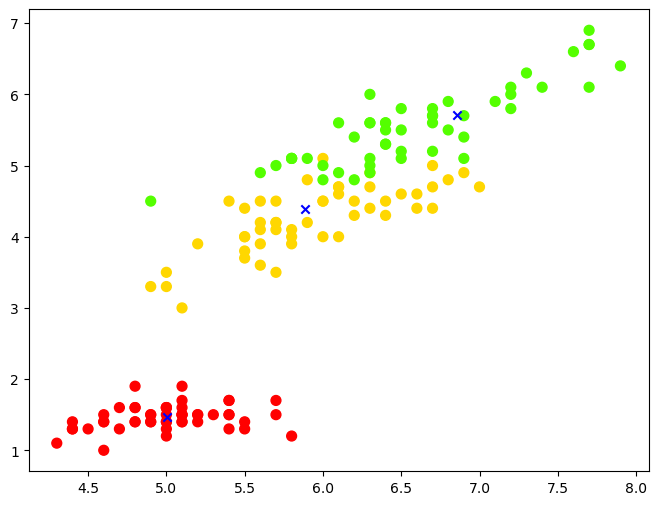

In [5]:
labels = kmeans.labels_

fig2, ax2 = plt.subplots(figsize=(8,6))
ax2.scatter(X[:,0],X[:,2],s = 50,c = y,marker='o')   
ax2.scatter(cc[:,0], cc[:,2], c = 'blue', marker = "x")

pass

## Outliers - Ausreißer

Es ist oft interessanter, welche Punkte außerhalb eines Clusters, oder sehr weit entfernt vom Cluster-Mittelpunkt entfernt sind.

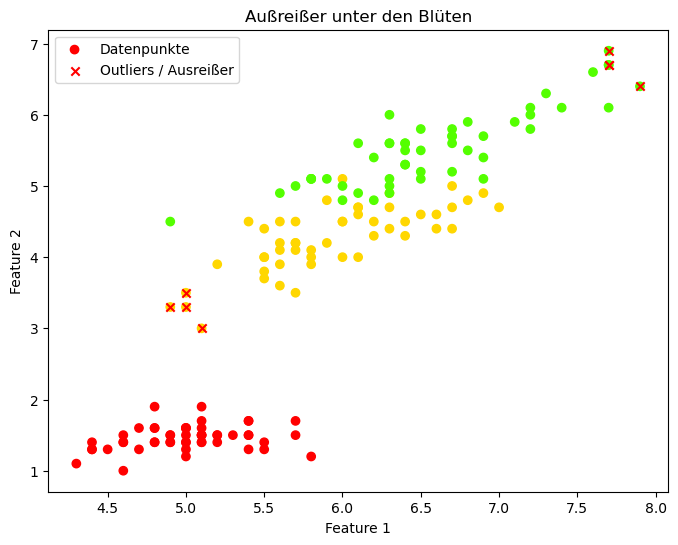

In [7]:
distances = np.linalg.norm(X - kmeans.cluster_centers_[kmeans.labels_], axis=1)

threshold = np.percentile(distances, 95)
outliers = X[distances > threshold]

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 2], c=y, marker='o', label='Datenpunkte')
plt.scatter(outliers[:, 0], outliers[:, 2], c='red', marker='x', label='Outliers / Ausreißer')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Außreißer unter den Blüten')
plt.legend()
plt.show()

### Links

Clustering mit sklearn $\rightarrow$ [sklearn Dokumentation](https://scikit-learn.org/stable/modules/clustering.html)